In [92]:
import numpy as np
import pandas as pd
import scipy.stats as ss


### 4.2.4 $\chi^2$検定


続いて、母平均の差の検定に次いでよく使うであろう、**独立性の検定(test of independence)**について紹介する。この検定を俗に$\chi^2$検定と呼ぶことが多い。また、この検定はクロス集計表に対してその表頭と表側の変数に関連があるかを確かめるために行われることから、クロス表の検定などとも呼ばれる。

[問題]　　男女別に、ある法案についての賛成、中立、反対を集計したところ、以下のようなクロス集計表が得られた。

|性別\態度|賛成|中立|反対|合計|
|:-:|:-:|:-:|:-:|:-:|
|男性|60|30|10|100|
|女性|20|40|40|100|
|合計|80|70|50|200|






In [3]:
cross = np.array([[60,30,10], [20,40,40]])
cross

array([[60, 30, 10],
       [20, 40, 40]])

In [223]:
cross = np.array([[60,30,10], [20,40,40]])
cross

chitest = ss.chi2_contingency(cross)
print('カイ二乗値', chitest[0])
print('p値', chitest[1]) # 片側p値
print('自由度', chitest[2])
print('期待度数表', chitest[3])

カイ二乗値 39.42857142857143
p値 2.7428022661917792e-09
自由度 2
期待度数表 [[40. 35. 25.]
 [40. 35. 25.]]


### 地道にχ二乗値を算出するのはめんどくさい

In [183]:
cross = pd.DataFrame(cross)
cross.columns = ['Agree','neutral','disagree'] 
cross.index=['MALE','FEMALE']


In [184]:
# 期待度数のデータフレームを作ってみる
total = pd.DataFrame(np.sum(cross,axis=0)).T
total.index = ['total']

expected_frac = total.values/np.sum(total,axis=1).values

x = [i * expected_frac for i in np.array(np.sum(cross,axis=1))]
expected_frequency = pd.DataFrame(np.array(x).flatten().reshape(2,3))
expected_frequency.columns = ['Agree','neutral','disagree']
expected_frequency.index= ['MALE','FEMALE']

display(cross)
display(expected_frequency)


,Agree,neutral,disagree
MALE,60,30,10
FEMALE,20,40,40


,Agree,neutral,disagree
MALE,40.0,35.0,25.0
FEMALE,40.0,35.0,25.0


In [228]:
cross-expected_frequency
(cross-expected_frequency)**2
(cross-expected_frequency)**2/expected_frequency
# np.sumですべての要素を足してほしいならndarrayに変換かけてから足す
chi_value = np.sum(((cross-expected_frequency)**2/expected_frequency).values)
# 計算結果は上記で求めたχ二乗値と一致する

d_of_freedom=(2-1)*(3-1)

chi2.ppf(0.95,d_of_freedom) # 棄却域

chi_value > chi2.ppf(0.95,d_of_freedom)


True

inspection

In [216]:
from scipy.stats import chi2
df=1
# 下側から自由度１のχ二乗分布の累積確立95%点を求めた
chi2.ppf(0.95, df)
# 下側から自由度10のχ二乗分布の累積確立95%点を求めた
df=10
chi2.ppf(0.95, df)

18.307038053275146

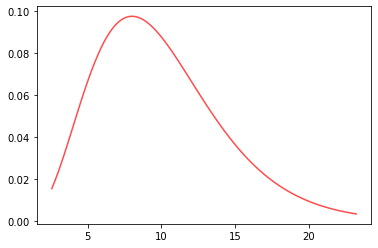

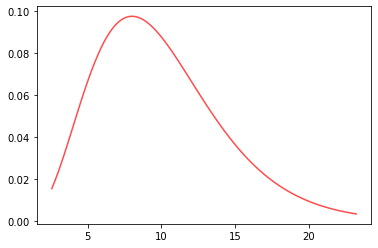

In [208]:
import matplotlib.pyplot as plt
from scipy.stats import chi2

fig, ax = plt.subplots(1, 1)
df = 10
x = np.linspace(chi2.ppf(0.01, df),
                chi2.ppf(0.99, df), 100)
ax.plot(x, chi2.pdf(x, df),
       'r-', alpha=0.7, label='chi2 pdf') # alpha = 色の濃さ、
# Probability density function.

fig, ax = plt.subplots(1, 1)
df = 10
x = np.linspace(chi2.ppf(0.01, df),
                chi2.ppf(0.99, df), 100)
ax.plot(x, chi2.pdf(x, df),
       'r-', alpha=0.7, label='chi2 pdf') # alpha = 色の濃さ、